In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import geopandas
import contextily as cx
import folium
import pickle
import os

In [56]:
c="Ordu"
df_path = os.path.join('data','OSM_combined',f'{c}_combined_osm_ms.pkl')
df = pickle.load(open(df_path,"rb"))
df["source"] = "OSM"
df.loc[(df["height"].isna())&(df["type"].isna())&(df["category"].isna())&(df["tags"].isna()), "source"]="MS"

df = df.dropna(axis=1, how='all')
df["density"]=1

df["combined_type"] = df["type"]
df.loc[df["type"]=="way","combined_type"]=df.loc[df["type"]=="way","category"]


df= geopandas.GeoDataFrame(df)
df = df.set_crs("EPSG:4326", allow_override=True)

df = df.to_crs("EPSG:3395")
df["area"] = df.area
df = df.to_crs("EPSG:4326")

df=df[["height","orient","combined_type",  "density","area", "source", "geometry",]]
df

,height,orient,combined_type,density,area,source,geometry
0,3.0,57.0,NaN,1,589.724363,OSM,"POLYGON ((37.85878 41.01506, 37.85899 41.01504..."
1,3.0,125.0,religious,1,517.641569,OSM,"POLYGON ((37.85890 41.01424, 37.85909 41.01425..."
2,3.0,52.0,Other buildings,1,150.135975,OSM,"POLYGON ((37.86598 41.00785, 37.86600 41.00785..."
3,3.0,67.0,Other buildings,1,907.775199,OSM,"POLYGON ((37.86608 41.00655, 37.86608 41.00655..."
4,3.0,41.0,Other buildings,1,1869.903589,OSM,"POLYGON ((37.86631 41.00708, 37.86631 41.00708..."
...,...,...,...,...,...,...,...
18037296,NaN,NaN,NaN,1,126.400222,MS,"POLYGON ((37.89608 40.96150, 37.89599 40.96152..."
18017693,NaN,NaN,NaN,1,308.375871,MS,"POLYGON ((37.94008 40.96198, 37.93991 40.96197..."
18041911,NaN,NaN,NaN,1,38.505512,MS,"POLYGON ((37.88468 40.96287, 37.88460 40.96287..."
18014246,NaN,NaN,NaN,1,121.105482,MS,"POLYGON ((37.95953 40.92272, 37.95953 40.92265..."


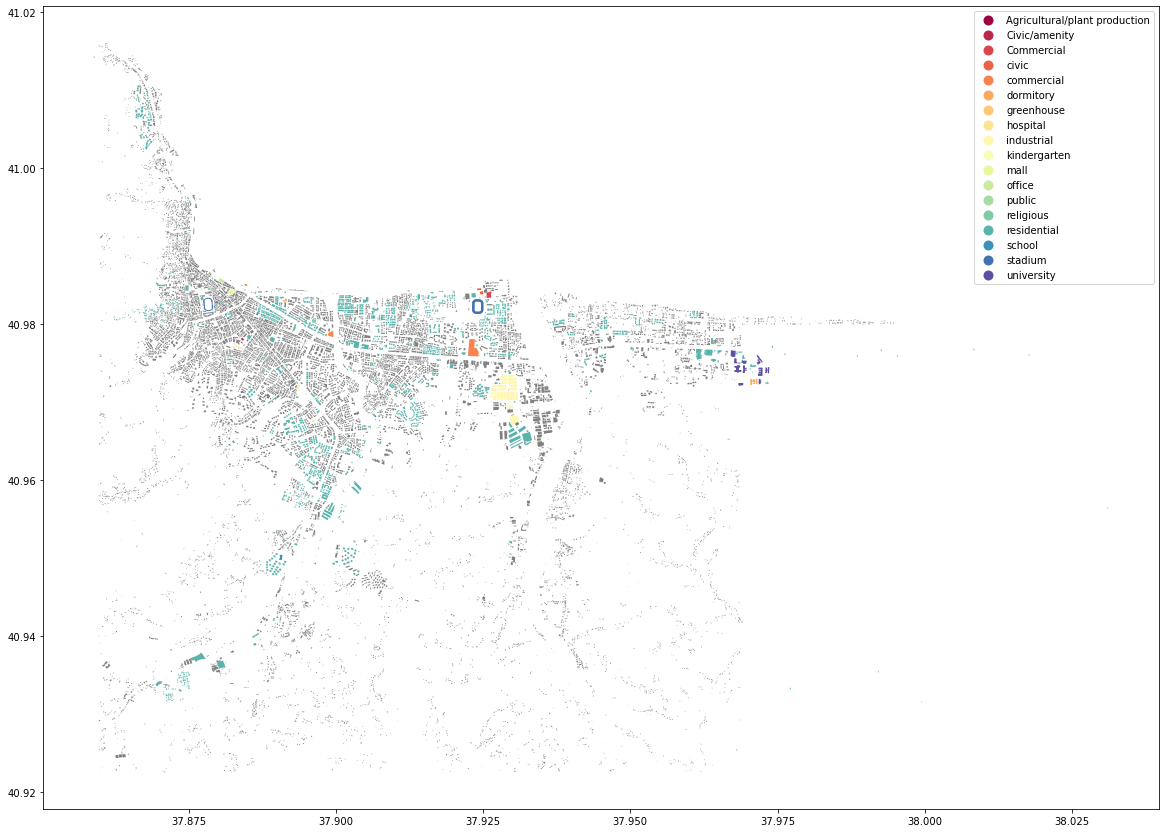

In [76]:
df.loc[df["combined_type"]=="roof","combined_type"]="residential"
df.loc[df["combined_type"]=="Accommodation","combined_type"]="residential"
df.loc[df["combined_type"]=="Other buildings","combined_type"]="residential"


ax = df[df["source"]=="MS"].plot(color="grey", figsize=(20,18))
ax = df.plot(column="combined_type", figsize=(20,18), ax=ax, legend=True, categorical=True,cmap='Spectral',)

In [68]:
df["combined_type"].unique()

array([nan, 'religious', 'Other buildings', 'school', 'residential',
       'Accommodation', 'office', 'stadium', 'roof', 'commercial',
       'dormitory', 'public', 'mall', 'hospital', 'greenhouse', 'civic',
       'industrial', 'university', 'kindergarten', 'Commercial',
       'Civic/amenity', 'Agricultural/plant production'], dtype=object)

In [69]:
df["combined_type"].value_counts()


Other buildings                  1500
residential                       380
religious                          49
industrial                         28
Accommodation                      18
university                         14
roof                               14
school                              5
greenhouse                          4
hospital                            4
Agricultural/plant production       4
dormitory                           4
commercial                          4
civic                               3
stadium                             3
office                              2
mall                                1
kindergarten                        1
Commercial                          1
Civic/amenity                       1
public                              1
Name: combined_type, dtype: int64